#Mouafak Alsaid Hasan
##Homework-03
###Naive Bayas' Classifier

##Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##Importing Data

In [15]:
#impoting the image data from hw02_data_set_images csv file.
image_data_set = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")

#impoting labels of the image data from hw02_data_set_labels csv file.
labels_data_set = np.genfromtxt("hw02_data_set_labels.csv",dtype= 'str', delimiter = ",").astype(str)

# creating arrays to seperate test and traing data sets
training_set_data, test_set_data  = [], []
training_set_labels, test_set_labels = [], []


# fill in the arrays above.
for i in range(len(image_data_set)):
  if i <25 or (i >= 39 and i < 64) or (i >= 78 and i< 103) or (i >= 117 and i< 142) or (i >= 156 and i < 181):
    training_set_data.append(image_data_set[i])
    training_set_labels.append(ord(labels_data_set[i][1]) -65)
  else:
    test_set_data.append(image_data_set[i])
    test_set_labels.append(ord(labels_data_set[i][1]) -65)


training_set_data = np.array(training_set_data)
test_set_data = np.array(test_set_data)
training_set_labels = np.array(training_set_labels)
test_set_labels = np.array(test_set_labels)

training_binary_labels = []
test_binary_labels = []

for i in test_set_labels:
  if i == 0:
    test_binary_labels.append([1,0,0,0,0])
  elif i == 1:
    test_binary_labels.append([0,1,0,0,0])
  elif i == 2:
    test_binary_labels.append([0,0,1,0,0])
  elif i == 3:
    test_binary_labels.append([0,0,0,1,0])
  elif i == 4:
    test_binary_labels.append([0,0,0,0,1])

test_binary_labels = np.array(test_binary_labels)

for i in training_set_labels:
  if i == 0:
    training_binary_labels.append([1,0,0,0,0])
  elif i == 1:
    training_binary_labels.append([0,1,0,0,0])
  elif i == 2:
    training_binary_labels.append([0,0,1,0,0])
  elif i == 3:
    training_binary_labels.append([0,0,0,1,0])
  elif i == 4:
    training_binary_labels.append([0,0,0,0,1])

training_binary_labels = np.array(training_binary_labels)

##Definitions

In [ ]:
def prior_probability(Y, C):
  return np.sum(Y[:,C])/len(Y)

def safelog(x):
    return(np.log(x + 1e-100))

def pij_estimator(X,Y,C):
  K = X.shape[1]
  class_prob = []
  for j in range(K):
   class_prob.append((np.matmul(X[:,j], Y[:,C])/ np.sum(Y[:,C])))
  return np.array(class_prob)

def class_estimator(X, Y):
  class_probability = []
  for i in range(5):
    class_probability.append(pij_estimator(X, Y, i))
  return np.array(class_probability)

def score_function(X, p, prior):
  return (np.dot(X, safelog(p.T)) + np.dot((1 - X), safelog((1 - p)).T) + prior)


def Y_predicted(X, Y, prob):
  mat = []
  for i in range(5):
    prior = prior_probability(Y, i)
    p = prob[i]
    mat.append(score_function(X, p, prior))
  scores = np.transpose(mat)
  return scores

p = class_estimator(training_set_data, training_binary_labels)
training_scores = Y_predicted(training_set_data, training_binary_labels, p)



## Naive Bayes' Classifier Implementation

##Drawing Class Image on Screen

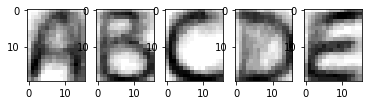

In [17]:
A = class_estimator(training_set_data, training_binary_labels)[0]
A = A.reshape((16, 20)).T
B = class_estimator(training_set_data, training_binary_labels)[1]
B = B.reshape((16, 20)).T
C = class_estimator(training_set_data, training_binary_labels)[2]
C = C.reshape((16, 20)).T
D = class_estimator(training_set_data, training_binary_labels)[3]
D = D.reshape((16, 20)).T
E = class_estimator(training_set_data, training_binary_labels)[4]
E = E.reshape((16, 20)).T
_,images = plt.subplots(1,5)
images[0].imshow(1 - A, cmap="gray", interpolation="nearest") 
images[1].imshow(1 - B, cmap="gray", interpolation="nearest") 
images[2].imshow(1 - C, cmap="gray", interpolation="nearest") 
images[3].imshow(1 - D, cmap="gray", interpolation="nearest") 
images[4].imshow(1 - E, cmap="gray", interpolation="nearest") 
plt.show()



##Confusion Matrix of Training Data points

In [18]:
# calculate confusion matrix
training_y_pred = np.argmax(training_scores, axis = 1)
confusion_matrix = pd.crosstab(training_y_pred, training_set_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   0   1   2   3   4
y_pred                     
0        25   0   0   0   0
1         0  24   1   0   1
2         0   0  24   0   0
3         0   1   0  25   0
4         0   0   0   0  24


##Confusion Matrix of Test Data points

In [19]:
# calculate confusion matrix
test_scores = Y_predicted(test_set_data, test_binary_labels, p)
test_y_pred = np.argmax(test_scores, axis = 1)
confusion_matrix_test = pd.crosstab(test_y_pred, test_set_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix_test)

y_truth  0   1  2   3   4
y_pred                   
0        7   0  0   0   0
1        0  11  3   2   4
2        0   0  7   0   0
3        7   3  3  12   0
4        0   0  1   0  10
